<p style="text-align:center; font-size:300%; line-height:300%; font-weight:bold; background-color:#2F52A3; color:white">Transformations géométriques</p>

<div style="font-weight:bold; background-color:#61C3CE">
    Evaluation :
    <ul>
        <li>Déterminer des matrices de transformation</li>
    </ul>
</div>

**Recommandations :**

+ Respectez rigoureusement la signature des fonctions (casse incluse), et les consignes.
+ Copiez-collez le code de votre fonction (ne contenant aucun print ou autre effet de bord) sur Moodle (CodeRunner)
+ Utilisez les alias définis ci-dessous. Ne faites pas d'import sur Moodle, c'est déjà fait.
+ Même si vous travaillez à plusieurs, faites un dépôt par personne.
+ Il n'y aura aucune "démo" dans les cinq dernières minutes. Ce travail et les tests Moodle seront pris en compte dans la note finale.
+ Vous allez coder **des fonctions**; cela signifie que vous **retournez** le résultat et que vous ne modifiez pas les paramètres (**pas d'effet de bord**).

**Objectifs :**
+ Représenter des figures planes.
+ Déterminer des matrices de transformations géométriques.
+ Utiliser le calcul matriciel pour effectuer des transformations géométriques.

In [1]:
import numpy as np
# La ligne suivante permet que les graphiques soient incorporés dans le notebook.
%matplotlib inline 
import matplotlib.pyplot as plt # Module "matplotlib" pour les graphiques.
import math # Pour utiliser la constante pi

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Les figures</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice : Premières représentations</p>

Exécutez et analysez le code de la cellule ci-dessous :
+ Enlevez le dernier sommet du carré et observez le résultat.
+ Décommentez l'instruction `plt.axis('scaled')` et observez le résultat.

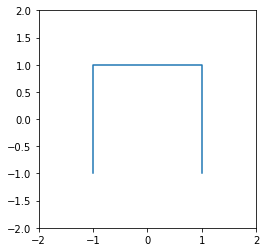

In [6]:
"""
Notez que le carré ci-dessus contient 5 sommets ... 
Le premier est répété afin de "fermer" la figure 
Essayez de supprimer ce dernier point pour observer la différence
"""

K = np.array([[1,1,-1,-1],[-1,1,1,-1]]) # Le carré à representer

plt.plot(K[0,:],K[1,:]) # Premier argument : les abscisses, Second argument : les ordonnées
plt.axis('scaled')
plt.axis([-2,2,-2,2]) # Limites de la figures xmin,xmax,ymin,ymax

plt.show() # C'est un carré qui n'a pas l'air de l'être ...

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Différentes formes et différentes représentations</p>

Dans la suite des manipulations à faire, vous aurez besoin des figures suivantes :
+ Un triangle isocèle rectangle `IR`
+ Un triangle équilatéral `Tri`
+ Un cercle `C`
+ Un parallèlogramme `Para`

Ces variables/figures sont définies dans la cellule ci-dessous.

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

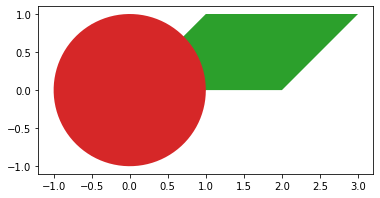

In [22]:
IR = np.array([[1,0,0,1],[0,1,0,0]])
Tri = np.array([ [1,-1/2,-1/2,1],[0,np.sqrt(3)/2,-np.sqrt(3)/2,0] ])

#Construction du cercle
n = 100
t = np.linspace(0,2*math.pi,n)
print(t)
C = np.array([np.cos(t),np.sin(t)])

Para = np.array([[0,2,3,1,0],[0,0,1,1,0]])

plt.fill(IR[0,:], IR[1,:], Tri[0,:], Tri[1,:], Para[0,:], Para[1,:], C[0,:], C[1,:])

plt.axis('scaled')
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice : Manipulations des figures</p>

A partir du code de la cellule précédente :
+ Affichez successivement ces $4$ figures.
+ Pour le cercle, changez la valeur de $n$ en utilisant : $50, 20, 10, 8, 5$.
+ Décommentez la ligne `print(t)` et observez le contenu de `t` pour chacune des valeurs de $n$ ci-dessus.
+ Remplacez la commande `plot` par la commande `fill` et observez
+ Représentez toutes les figures données sur un même graphique

**Remarques :**
+ L'instruction `np.linspace(a,b,n)` retourne un tableau de $n$ valeurs équitablement réparties dans l'intervalle $\lbrack a,b\rbrack$. La première valeur est toujours $a$, la dernière est toujours $b$.
+ Pour representer plusieurs figures sur un même graphique, il suffit de faire plusieurs `plot` avant le `show`

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Les transformations</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice : Rotations et Hométhéties</p>

Codez les fonctions ci-dessous :
+ Ecrivez une fonction `R(theta)` qui retourne la **matrice** de rotation du plan d'angle `theta` de centre $(0,0)$.
+ Ecrivez une fonction `H(k)` qui retourne la **matrice** d'homothétie du plan de rapport `k` de centre $(0,0)$.

**Indications :**
+ L'usage de vos fonctions doit être le suivant : `newK = H(2) @ K`.
+ Alors la variable `newK` contient l'image du carré `K` par l'homothétie de centre $(0,0)$ et de rapport $2$.**

Réalisez la figure ci-dessous pour tester vos fonctions :

<img src="carres.png" />

In [30]:
def R(theta):return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
#print(R(5))

def H(K):return np.array([[k, 0], [0, k]])
    

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice : Translations</p>

Codez la fonction ci-dessous :
+ Ecrivez une fonction `T(u, F)` qui retourne le translaté de la figure `F` par la translation de vecteur `u`. 
Le vecteur `u` doit être un `np.array` de deux lignes et une colonne. 

**Indications :**
+ Notez que le fonctionnement est différent des fonctions précédentes. 
+ L'usage sera `newC = T(U, C)` 
+ Après cette instruction la variable `newC` contient l'image de `C` par la translation de vecteur `U`.

Réalisez la figure ci-dessous pour tester votre fonction :

<img src="cercles.png" />

**Indication :** 
+ La fonction `np.ones` peut vous simplifier la tâche.

In [ ]:
def T(u, F):return F + u @ np.ones([1, F.shape[1]])
        

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice : Projections et Symétries</p>

**Attention :**
+ Cette partie est plus difficile. 
+ Pour réussir, il me parrait indispensable de réaliser des calculs "papier-crayon" avant de chercher à coder.
+ Utilisez les exemples de cours et TD pour vous aider.

Questions :
+ Ecrivez une fonction `Pr(a)` qui retour la **matrice** de la projection orthogonale sur la droite d'équation $y = ax$.
+ Ecrivez une fonction `S(a)` qui retour la **matrice** de la symétrie orthogonale par rapport à droite d'équation $y = ax$.

**Indications :**
+ L'usage de vos fonctions doit être le suivant : `newK = S(2) @ K`.
+ Alors la variable `newK` contient l'image du carré `K` par la symétrie d'axe d'équation $y = 2x$.
+ Le fonctionnement est le même que pour les rotations et homothéties.
+ Pour la symétrie, utilisez la projection.
+ Testez vos fonctions avec les exemples du cours et du TD
+ Vérifiez que les projections satisfont $P^2 = P$ et les symétries $S^2 = I$.

In [ ]:
def Pr(a): return np.array([[(1/a**2 +1), a/(a**2 +1)], [a/(a**2 +1), (a**2)/(a**2 +1)]])

def S(a): return 2 * Pr(a) - np.eye(Pr(a).shape[0])

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">Attention : </p>

Le travail à rendre pour ce TP est :
+ les fonctions `R(theta)` et `H(k)`
+ la fonction `T(u, F)`
+ les fonctions `Pr(a)` et `S(a)`